## Panel 4 in Bloniasz, Oyama, Stephen (2024)

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

from filtered_point_process.PointProcess import PointProcessModel
from filtered_point_process.FPP import FilteredPointProcess

In [2]:
# Increase the global font size for all text in the plots
plt.rcParams["font.size"] = 30
plt.rcParams["axes.titlesize"] = 30  # For subplot titles
plt.rcParams["axes.labelsize"] = 30  # For x and y labels
plt.rcParams["xtick.labelsize"] = 30  # For x-axis tick labels
plt.rcParams["ytick.labelsize"] = 30  # For y-axis tick labels
plt.rcParams["legend.fontsize"] = 30  # For legend text

In [ ]:
#### CIF Functions

# Parameters for the GABA simulation

# Define Simulation Method
method = "AR(p)"


params = {
    "method": "AR(p)",
    "ar_coeffs": [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.315,
    "fs": 1000,
    "T": 5,
    "Nsims": 1,
    "lambda_0": [50],  # 75
}


model_1 = PointProcessModel(params=params, seed=45)
model_1.simulate_pp()  # Simulate the CIF model for model_1

# Define the filters to be used
filters = {"GABA": "GABA", "1/f": "1/f"}

# Instantiate the FilteredPointProcess class with the specified filters and model
fpp = FilteredPointProcess(filters=filters, model=model_1)


filter_output = fpp.get_filters()

In [4]:
# Panel 1 info

frequencies = np.abs(fpp.pp.params["frequencies"])

total_pp_PSD = (
    fpp.model.pp_PSD
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

cif_PSD = (
    fpp.model.cif_PSD
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

pp_rate = (
    (fpp.model.pp_PSD - fpp.model.cif_PSD)
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)


def find_intersection(x, y1, y2):
    idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
    return x[idx], y1[idx]

[6.56 6.57]


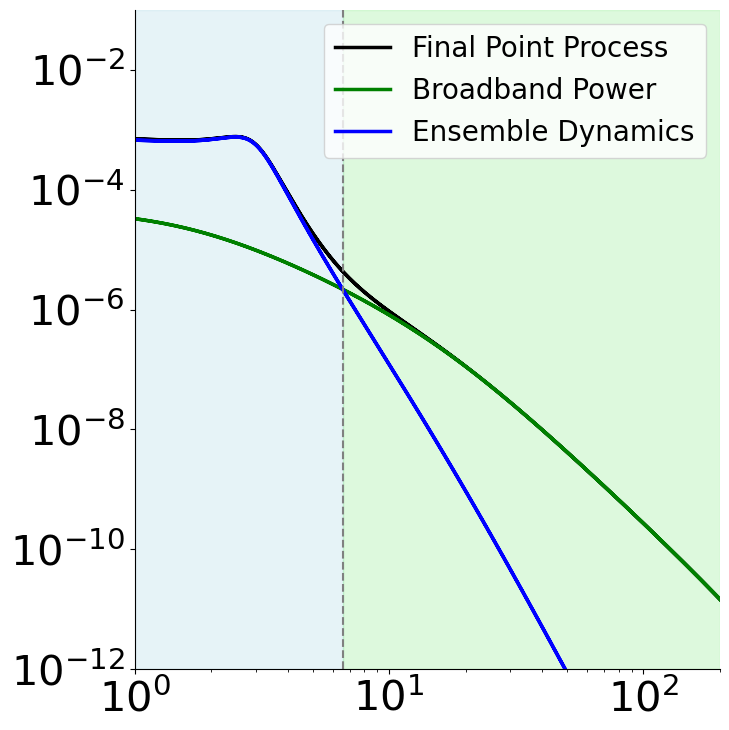

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def find_intersection(freq, cif_power, pp_rate):
    intersection_indices = np.argwhere(np.diff(np.sign(cif_power - pp_rate))).flatten()
    if intersection_indices.size > 0:
        return freq[intersection_indices], cif_power[intersection_indices]
    else:
        return np.array([]), np.array([])


# Set figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Increase the global font size for all text in the plots
plt.rcParams["font.size"] = 30
plt.rcParams["axes.titlesize"] = 30  # For subplot titles
plt.rcParams["axes.labelsize"] = 30  # For x and y labels
plt.rcParams["xtick.labelsize"] = 30  # For x-axis tick labels
plt.rcParams["ytick.labelsize"] = 30  # For y-axis tick labels
plt.rcParams["legend.fontsize"] = 20  # For legend text

# Panel 1
ax.loglog(
    frequencies, total_pp_PSD, label="Final Point Process", color="black", linewidth=2.5
)
ax.loglog(
    frequencies, pp_rate, label="Broadband Power", color="green", alpha=1, linewidth=2.5
)
ax.loglog(
    frequencies,
    cif_PSD,
    label="Ensemble Dynamics",
    color="blue",
    alpha=1,
    linewidth=2.5,
)
ax.set_xlim([1, 200])
ax.set_ylim([1e-12, 1e-1])
ax.legend()

# Intersection for Panel 1
x_inter, _ = find_intersection(frequencies, cif_PSD, pp_rate)
if x_inter.size > 0:
    ax.axvline(
        x=x_inter[0], color="gray", linestyle="--"
    )  # Plot only the first intersection
    ax.axvspan(1, x_inter[0], color="lightblue", alpha=0.3)
    ax.axvspan(x_inter[0], 200, color="lightgreen", alpha=0.3)
    print(x_inter)

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

# Save the plot
# Show plot
plt.show()

In [6]:
#### CIF Functions


# Define Simulation Method
method = "AR(p)"


params = {
    "method": "AR(p)",
    "ar_coeffs": [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.315,
    "fs": 1000,
    "T": 5,
    "Nsims": 1,
    "lambda_0": [400],  # 75
}


model_2 = PointProcessModel(params=params, seed=45)
model_2.simulate_pp()  # Simulate the CIF model for model_1

# Define the filters to be used
filters = {"GABA": "GABA", "1/f": "1/f"}

# Instantiate the FilteredPointProcess class with the specified filters and model
fpp_2 = FilteredPointProcess(filters=filters, model=model_2)

total_pp_PSD_2 = (
    fpp_2.model.pp_PSD
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

cif_PSD_2 = (
    fpp_2.model.cif_PSD
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

pp_rate_2 = (
    (fpp_2.model.pp_PSD - fpp_2.model.cif_PSD)
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

In [7]:
#### CIF Functions

# Parameters for the GABA simulation

# Define Simulation Method
method = "AR(p)"


params = {
    "method": "AR(p)",
    "ar_coeffs": [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.315,
    "fs": 1000,
    "T": 5,
    "Nsims": 1,
    "lambda_0": [50],  # 75
}


model_3 = PointProcessModel(params=params, seed=45)
model_3.simulate_pp()  # Simulate the CIF model for model_1

# Define the filters to be used
filters = {"GABA": "GABA", "1/f": "1/f"}

# Instantiate the FilteredPointProcess class with the specified filters and model
fpp_3 = FilteredPointProcess(filters=filters, model=model_3)

total_pp_PSD_3 = (
    fpp_3.model.pp_PSD
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

cif_PSD_3 = (
    fpp_3.model.cif_PSD
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

pp_rate_3 = (
    (fpp_3.model.pp_PSD - fpp_3.model.cif_PSD)
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

In [8]:
#### CIF Functions

# Parameters for the GABA simulation

# Define Simulation Method
method = "AR(p)"


params = {
    "method": "AR(p)",
    "ar_coeffs": [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.1,
    "fs": 1000,
    "T": 5,
    "Nsims": 1,
    "lambda_0": [50],  # 75
}

model_4 = PointProcessModel(params=params, seed=45)
model_4.simulate_pp()  # Simulate the CIF model for model_1

# Define the filters to be used
filters = {"GABA": "GABA", "1/f": "1/f"}

# Instantiate the FilteredPointProcess class with the specified filters and model
fpp_4 = FilteredPointProcess(filters=filters, model=model_4)

total_pp_PSD_4 = (
    fpp_4.model.pp_PSD
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

cif_PSD_4 = (
    fpp_4.model.cif_PSD
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

pp_rate_4 = (
    (fpp_4.model.pp_PSD - fpp_4.model.cif_PSD)
    * filter_output["GABA"]["power_spectrum"]
    * filter_output["1/f"]["power_spectrum"]
)

[6.56 6.57]
[4.39 4.4 ]
[6.56 6.57]
[4.23 4.24]


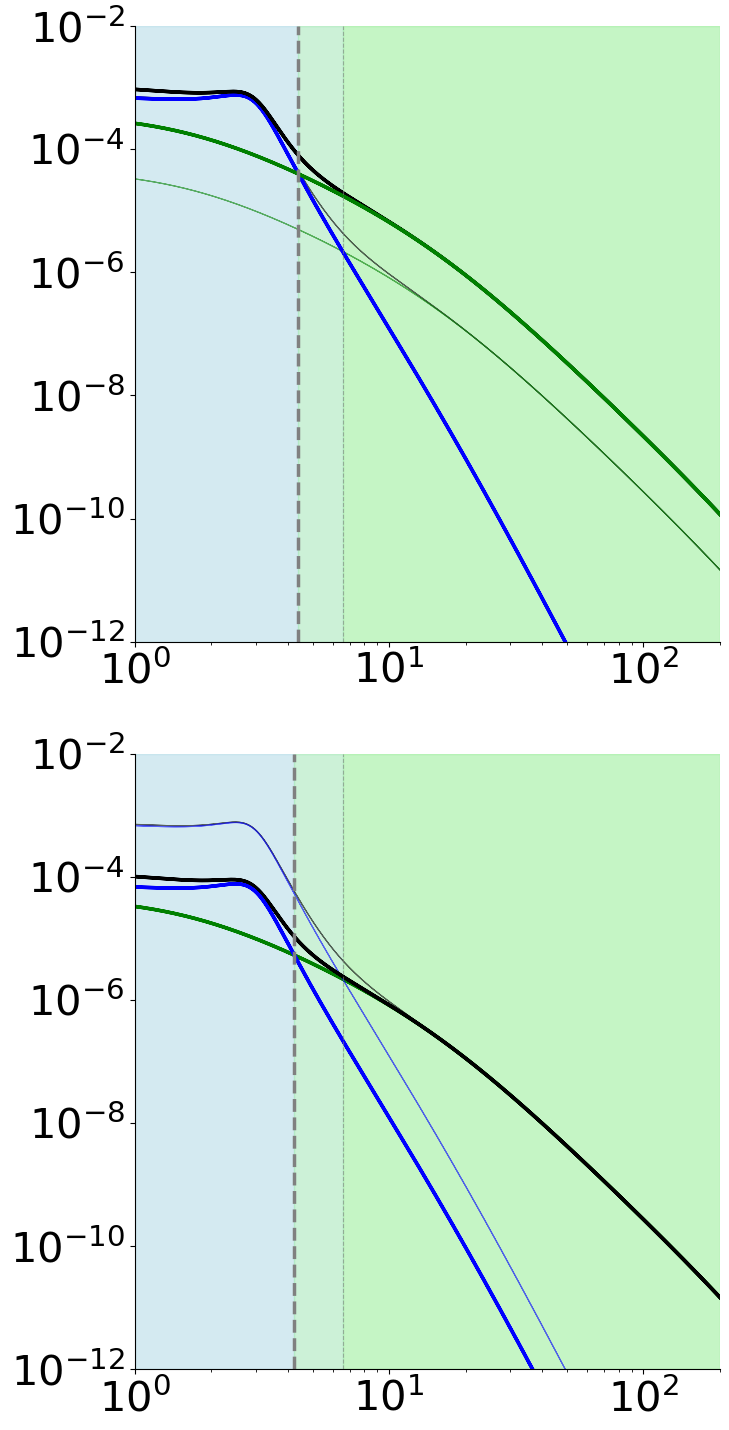

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 15))


# Customizing linestyle for clarity
line_styles = {
    "pp_before": "-",
    "pp_after": "-",
    "rate_before": "-",
    "rate_after": "-",
    "cif_before": "-",
    "cif_after": "-",
}
alpha_levels = {
    "pp_before": 0.6,
    "pp_after": 1,
    "rate_before": 0.6,
    "rate_after": 1,
    "cif_before": 0.6,
    "cif_after": 1,
}
line_thickness = {
    "pp_before": 0.8,
    "pp_after": 2.5,
    "rate_before": 0.8,
    "rate_after": 2.5,
    "cif_before": 0.8,
    "cif_after": 2.5,
}
colors = {
    "pp_before": "black",
    "pp_after": "black",
    "rate_before": "green",
    "rate_after": "green",
    "cif_before": "blue",
    "cif_after": "blue",
}

# Panel 1 plotting
axs[0].loglog(
    frequencies,
    total_pp_PSD,
    label=f"PP ($\\lambda_0 = 200$ Hz)",
    linestyle=line_styles["pp_before"],
    alpha=alpha_levels["pp_before"],
    color=colors["pp_before"],
    linewidth=line_thickness["pp_before"],
)
axs[0].loglog(
    frequencies,
    pp_rate,
    label="Point Process Rate $\\lambda_0 = 200$ Hz",
    linestyle=line_styles["rate_before"],
    alpha=alpha_levels["rate_before"],
    color=colors["rate_before"],
    linewidth=line_thickness["rate_before"],
)
axs[0].loglog(
    frequencies,
    cif_PSD,
    label="CIF (Fixed)",
    linestyle=line_styles["cif_after"],
    alpha=alpha_levels["cif_after"],
    color=colors["cif_after"],
    linewidth=line_thickness["cif_after"],
)
axs[0].loglog(
    frequencies,
    total_pp_PSD_2,
    label="Point Process $\\lambda_0 = 1000$ Hz",
    linestyle=line_styles["pp_after"],
    alpha=alpha_levels["pp_after"],
    color=colors["pp_after"],
    linewidth=line_thickness["pp_after"],
)
axs[0].loglog(
    frequencies,
    pp_rate_2,
    label="Point Process Rate $\\lambda_0 = 1000$ Hz",
    linestyle=line_styles["rate_after"],
    alpha=alpha_levels["rate_after"],
    color=colors["rate_after"],
    linewidth=line_thickness["rate_after"],
)

axs[0].set_xlim([1, 200])
axs[0].set_ylim([1e-12, 1e-2])
# axs[0].legend()

# Intersections for Panel 1
x_inter, _ = find_intersection(frequencies, cif_PSD, pp_rate)
if len(x_inter) > 0:
    axs[0].axvline(x=x_inter[0], color="gray", linestyle="--", linewidth=0.8, alpha=0.6)
    axs[0].axvspan(1, x_inter[0], color="lightblue", alpha=0.3)
    axs[0].axvspan(x_inter[0], 200, color="lightgreen", alpha=0.3)
    print(x_inter)

x_inter, _ = find_intersection(frequencies, cif_PSD_2, pp_rate_2)
if len(x_inter) > 0:
    axs[0].axvline(x=x_inter[0], color="gray", linestyle="--", linewidth=2.5)
    axs[0].axvspan(1, x_inter[0], color="lightblue", alpha=0.3)
    axs[0].axvspan(x_inter[0], 200, color="lightgreen", alpha=0.3)
    print(x_inter)

# Panel 2 plotting
axs[1].loglog(
    frequencies,
    total_pp_PSD_3,
    label="Point Process $\\phi = 0.98$",
    linestyle=line_styles["pp_before"],
    alpha=alpha_levels["pp_before"],
    color=colors["pp_before"],
    linewidth=line_thickness["pp_before"],
)
axs[1].loglog(
    frequencies,
    pp_rate_3,
    label="Mean Rate (Fixed)",
    linestyle=line_styles["rate_after"],
    alpha=alpha_levels["rate_after"],
    color=colors["rate_after"],
    linewidth=line_thickness["rate_after"],
)
axs[1].loglog(
    frequencies,
    cif_PSD_3,
    label="CIF $\\phi = 0.98$",
    linestyle=line_styles["cif_before"],
    alpha=alpha_levels["cif_before"],
    color=colors["cif_before"],
    linewidth=line_thickness["cif_before"],
)
axs[1].loglog(
    frequencies,
    total_pp_PSD_4,
    label="Point Process $\\phi = 0.95$",
    linestyle=line_styles["pp_after"],
    alpha=alpha_levels["pp_after"],
    color=colors["pp_after"],
    linewidth=line_thickness["pp_after"],
)
axs[1].loglog(
    frequencies,
    cif_PSD_4,
    label="CIF $\\phi = 0.95$",
    linestyle=line_styles["cif_after"],
    alpha=alpha_levels["cif_after"],
    color=colors["cif_after"],
    linewidth=line_thickness["cif_after"],
)

axs[1].set_xlim([1, 200])
axs[1].set_ylim([1e-12, 1e-2])
# axs[1].legend()

# Intersections for Panel 2
x_inter, _ = find_intersection(frequencies, cif_PSD_3, pp_rate_3)
if len(x_inter) > 0:
    axs[1].axvline(x=x_inter[0], color="gray", linestyle="--", linewidth=0.8, alpha=0.6)
    axs[1].axvspan(1, x_inter[0], color="lightblue", alpha=0.3)
    axs[1].axvspan(x_inter[0], 200, color="lightgreen", alpha=0.3)

print(x_inter)

x_inter, _ = find_intersection(frequencies, cif_PSD_4, pp_rate_4)
if len(x_inter) > 0:
    axs[1].axvline(x=x_inter[0], color="gray", linestyle="--", linewidth=2.5)
    axs[1].axvspan(1, x_inter[0], color="lightblue", alpha=0.3)
    axs[1].axvspan(x_inter[0], 200, color="lightgreen", alpha=0.3)

print(x_inter)
for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.tight_layout()

plt.show()